# Student Performance Indicator

### Steps performed:-
    Life cycle of Machine learning Project
    Understanding the Problem Statement
    Data Collection
    Data Checks to perform
    Exploratory data analysis
    Data Pre-Processing
    Model Training
    Choose best model

### 1) Problem Statement:- 
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection:-
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

### 2.1 Import required libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [30]:
data = pd.read_csv('C:/Users/DELL/Desktop/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Top 10 records

In [33]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Shape of dataset

In [38]:
data.shape

(1000, 8)

### 3) Check Data:-

### 3.1 check for missing values

In [44]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [48]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 3.2 check duplicates

In [53]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [55]:
data.duplicated().sum()

0

to remove duplicates df.drop_duplicates()

### 3.3 check data dtypes and null values

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 check statistical info 

In [64]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Mean lies between 66 to 68

std lies between 14 to 15.2

min math score is 0 and and for writing is 10

### 3.5 check unique values

In [71]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.6 explore data

checking for unique values in each column

In [87]:
print("gender",end = " ")
print(data['gender'].unique())

print("race/ethnicity",end = " ")
print(data['race/ethnicity'].unique())

print("parental level of education",end = " ")
print(data['parental level of education'].unique())

print("lunch",end = " ")
print(data['lunch'].unique())

print("test preparation course",end = " ")
print(data['test preparation course'].unique())



gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']


identifying numerical and categorical columns

In [100]:
num_col = [i for i in data.columns if data[i].dtype != 'O']
num_col



['math score', 'reading score', 'writing score']

In [98]:
cat_col = [i for i in data.columns if data[i].dtype == 'O']
cat_col

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

### 3.7 Add new columns for Total Score and Average Score

In [105]:
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

In [107]:
data['average_score'] = data['total_score']/3

In [111]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [129]:
reading_full = (data['reading score'] == 100).sum()
reading_full

17

In [131]:
math_full = (data['math score'] == 100).sum()
math_full

7

In [133]:
writing_full = (data['writing score'] == 100).sum()
writing_full

14

In [137]:
reading_less10 = (data['reading score'] <= 10).sum()
reading_less10

0

In [139]:
math_less10 = (data['math score'] <= 10).sum()
math_less10

2

In [143]:
writing_less10 = (data['writing score'] <=10).sum()
writing_less10

1

Best performance in reading

Worst performance in maths

### 4) Data Visualization

### 4.1 Visualize average score using histplot and KDE

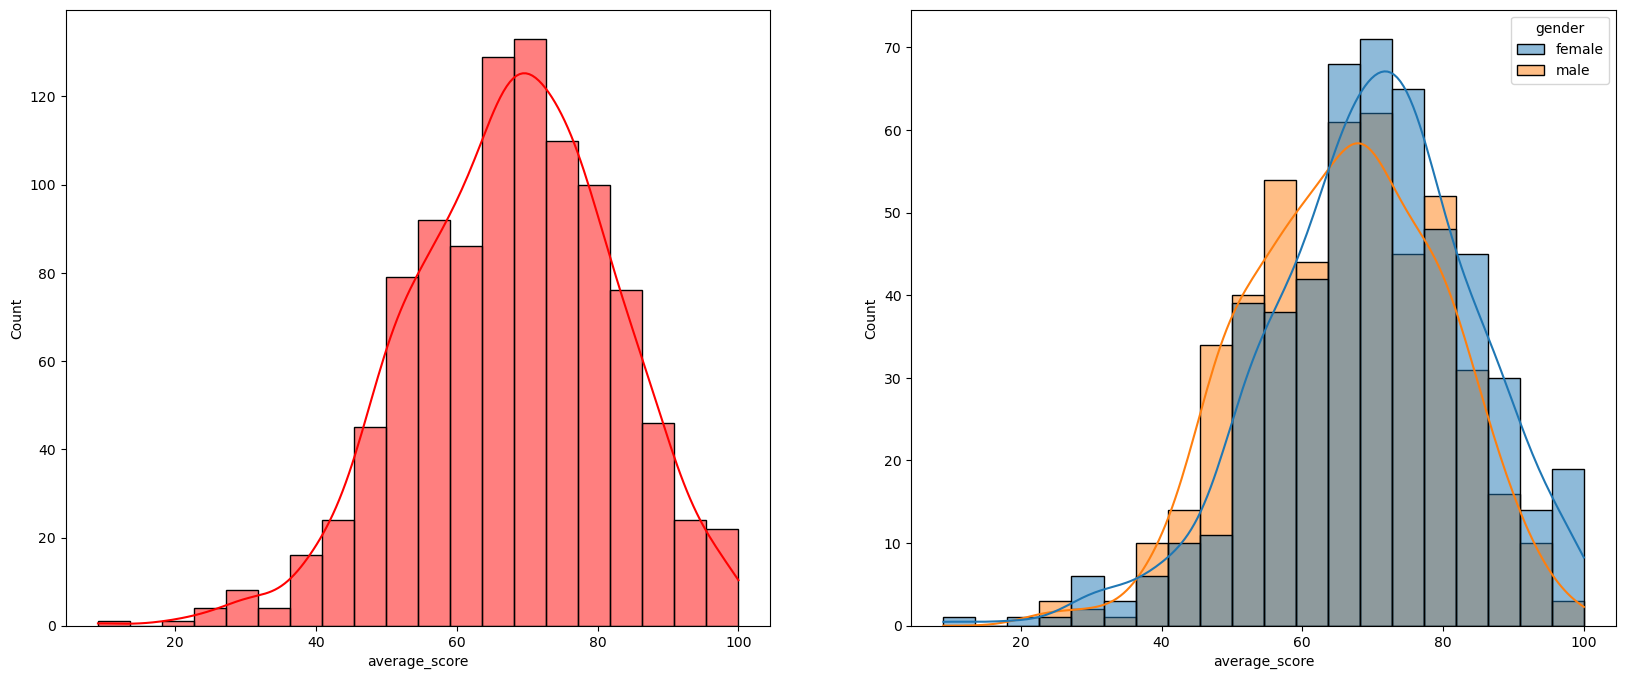

In [156]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(data=data,x='average_score',kde=True,bins=20,color='red')
plt.subplot(1,2,2)
sns.histplot(data=data,x='average_score',kde=True,bins=20,hue='gender')
plt.show()

### 4.2 Visualize total score using histplot and KDE

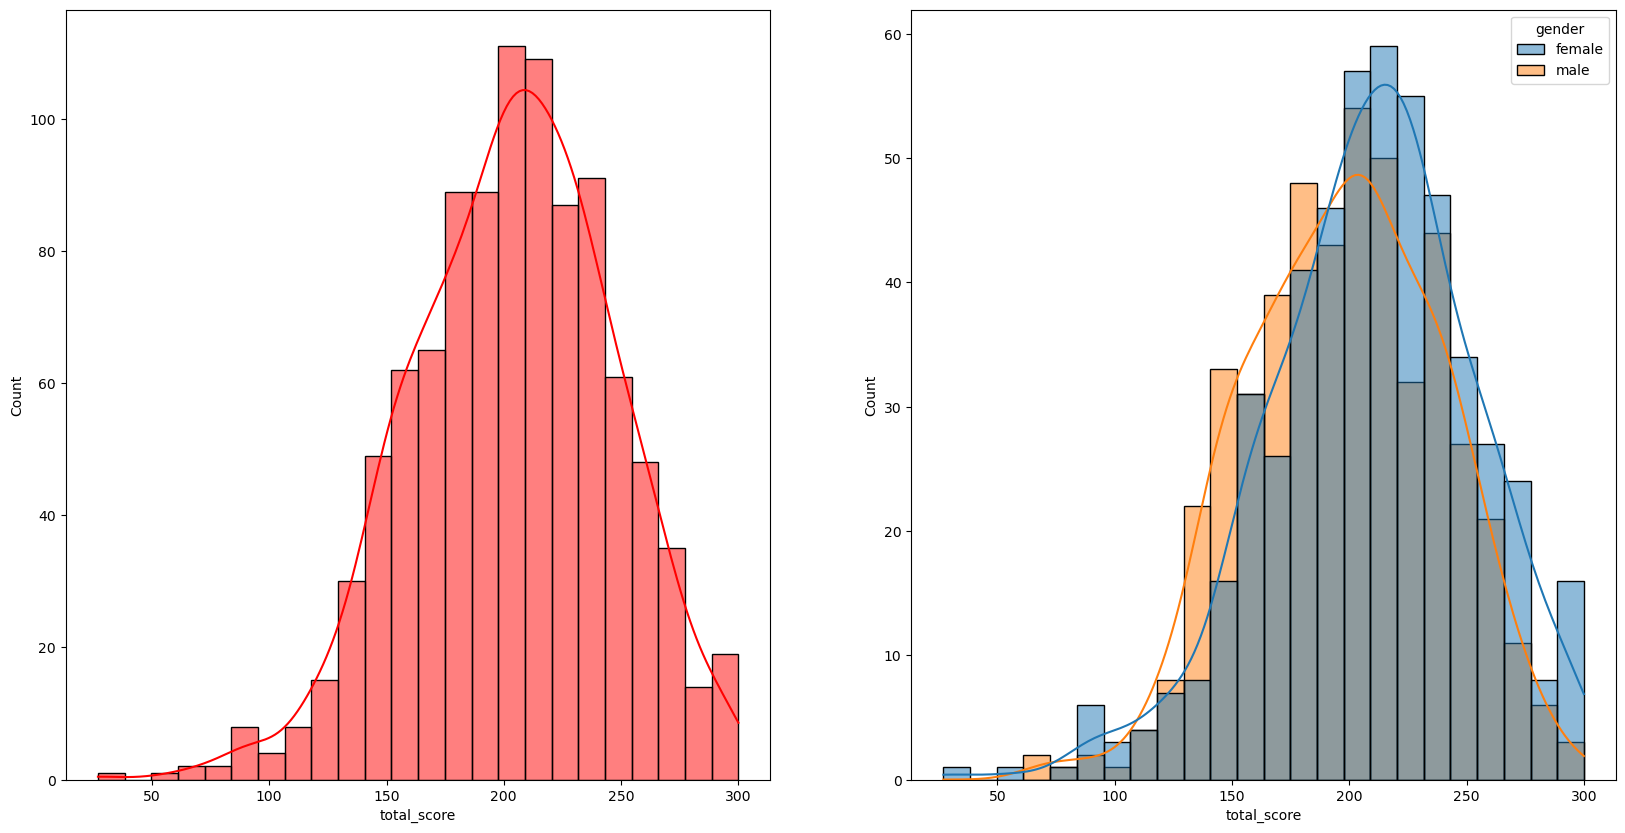

In [165]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(data=data,x='total_score',kde=True,color='red')
plt.subplot(1,2,2)
sns.histplot(data=data,x='total_score',kde=True,hue='gender')
plt.show()

Females score more than males

### 4.3 Effect of lunch on performance

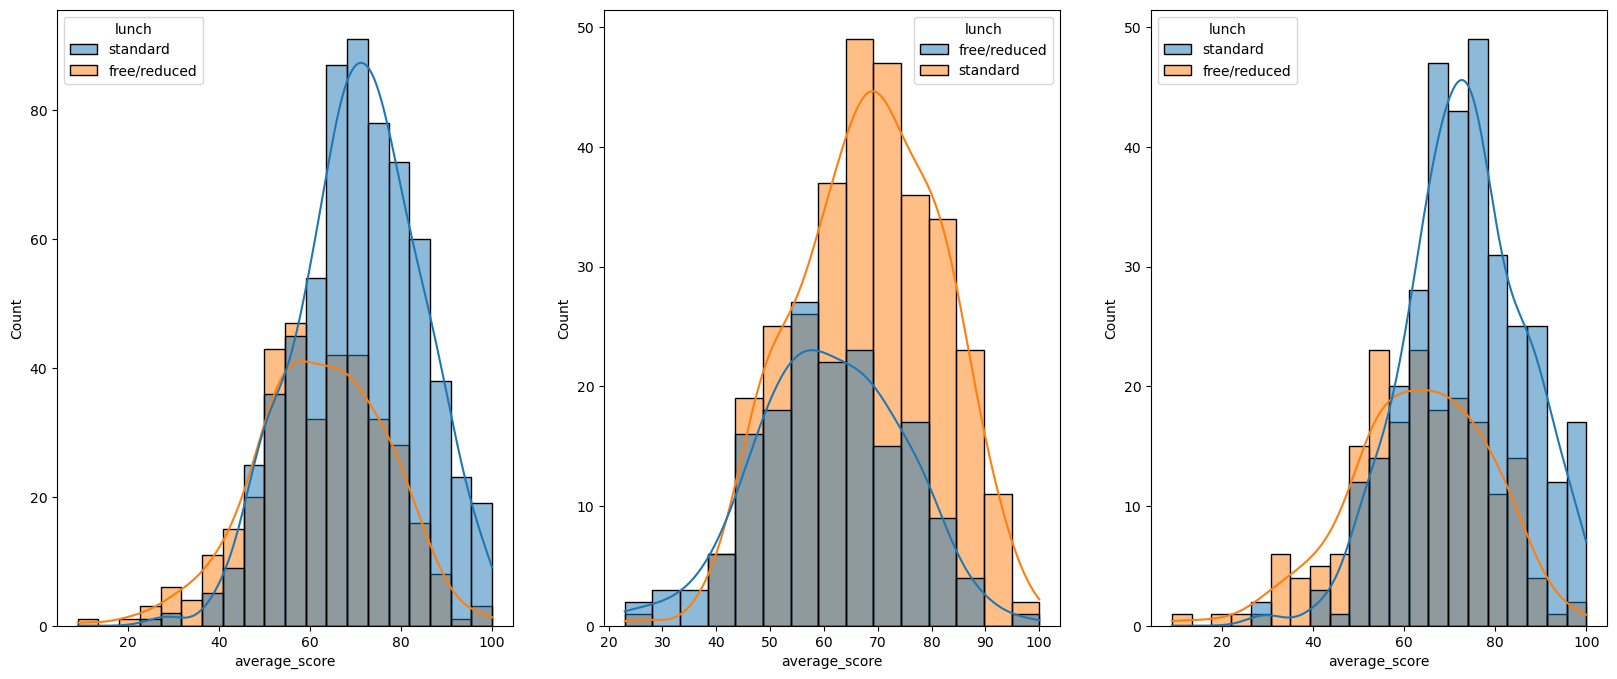

In [174]:
fig, axs = plt.subplots(1, 3, figsize = (20,8))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='average_score', kde=True, bins = 20, hue = 'lunch')
plt.subplot(1, 3, 2)
sns.histplot(data = data[data.gender == 'male'], x='average_score', kde=True, hue='lunch')
plt.subplot(1, 3, 3)
sns.histplot(data = data[data.gender == 'female'], x='average_score', kde=True, hue='lunch')
plt.show()


Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

### 4.4 Effect of parental level of education on performance

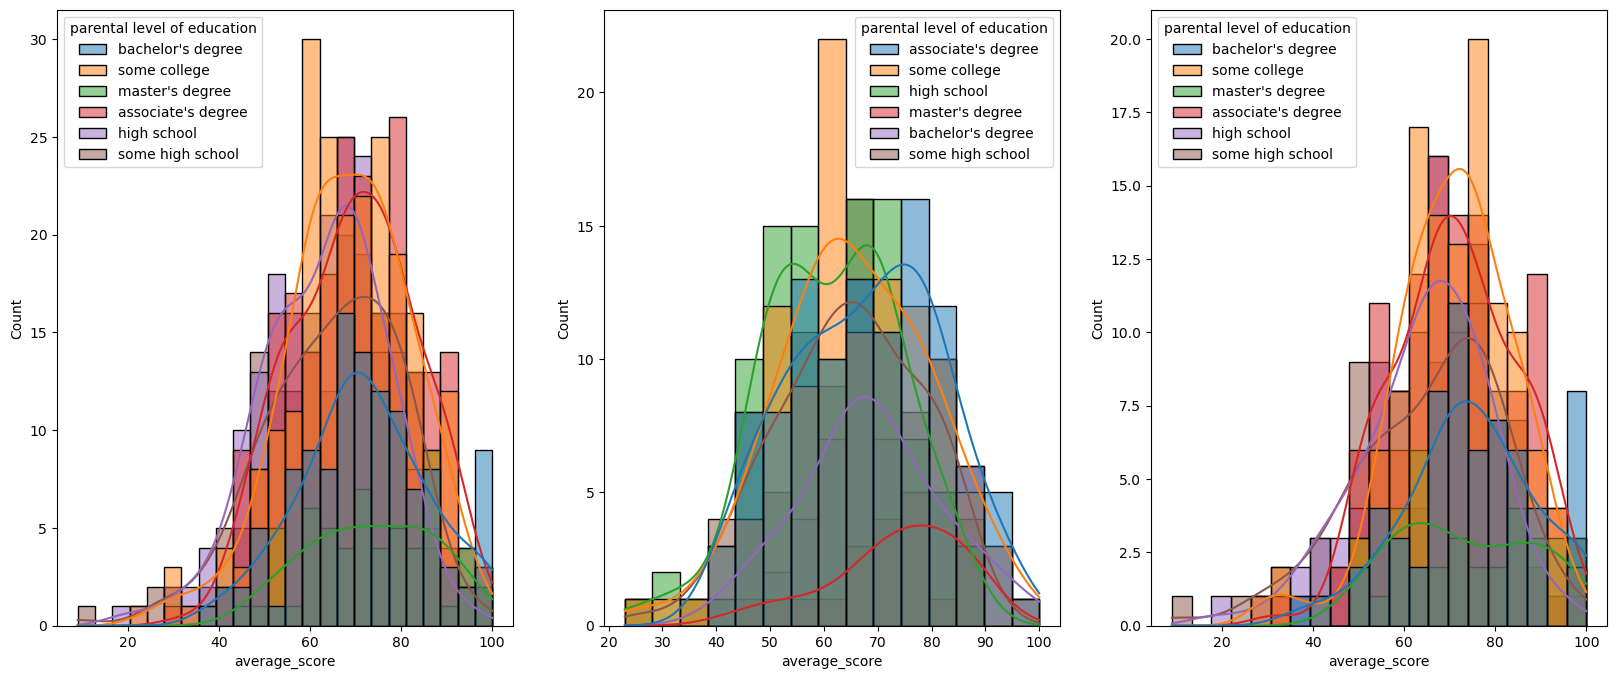

In [195]:
fig, axs = plt.subplots(1, 3, figsize = (20,8))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='average_score', kde=True, hue='parental level of education')
plt.subplot(1, 3, 2)
sns.histplot(data=data[data.gender=='male'], x='average_score', kde=True, hue='parental level of education')
plt.subplot(1, 3, 3)
sns.histplot(data=data[data.gender=='female'], x='average_score', kde=True, hue='parental level of education')
plt.show()


In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

### 4.5 Effect of race/ethnicity on performance

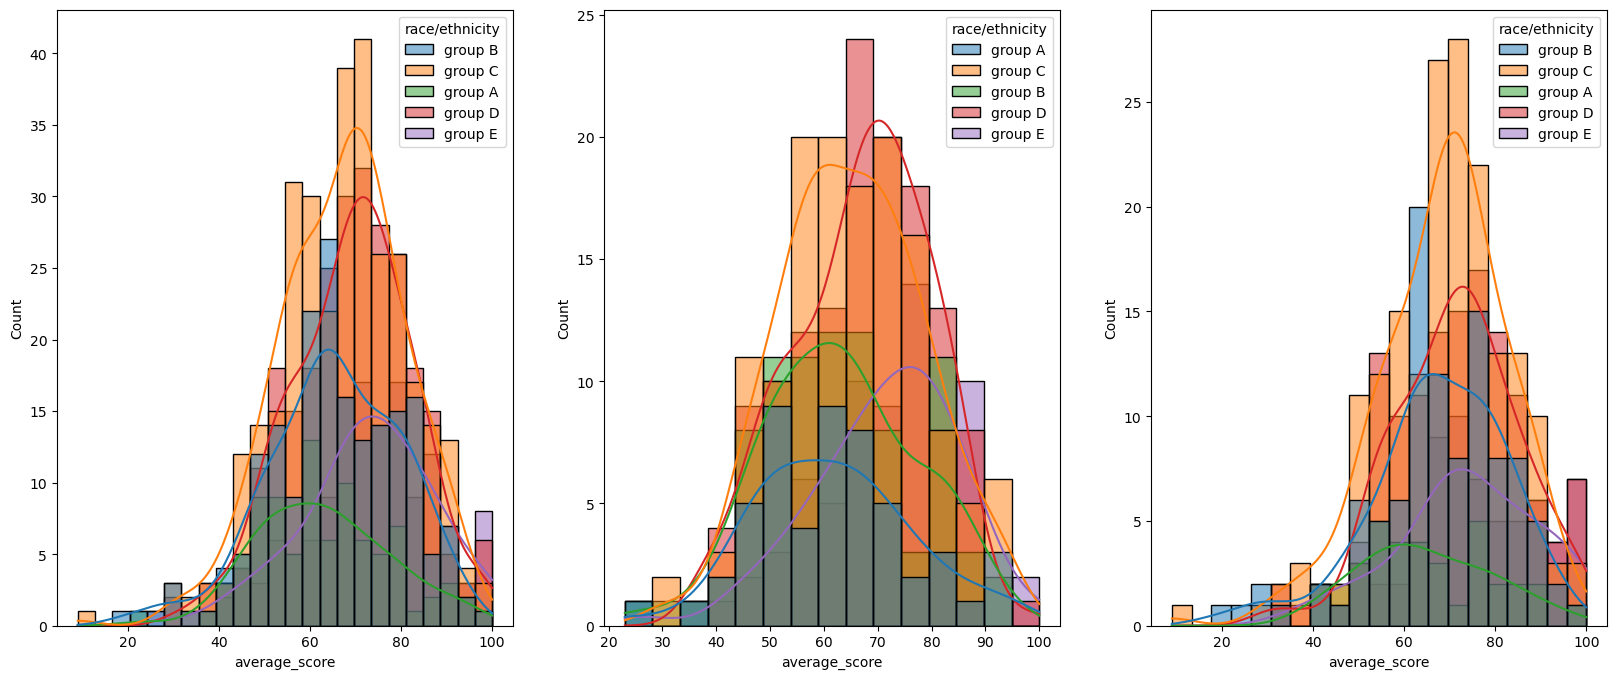

In [200]:
fig, axs = plt.subplots(1, 3, figsize = (20,8))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='average_score', kde=True, hue='race/ethnicity')
plt.subplot(1, 3, 2)
sns.histplot(data=data[data.gender=='male'], x='average_score', kde=True, hue='race/ethnicity')
plt.subplot(1, 3, 3)
sns.histplot(data=data[data.gender=='female'], x='average_score', kde=True, hue='race/ethnicity')
plt.show()


Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

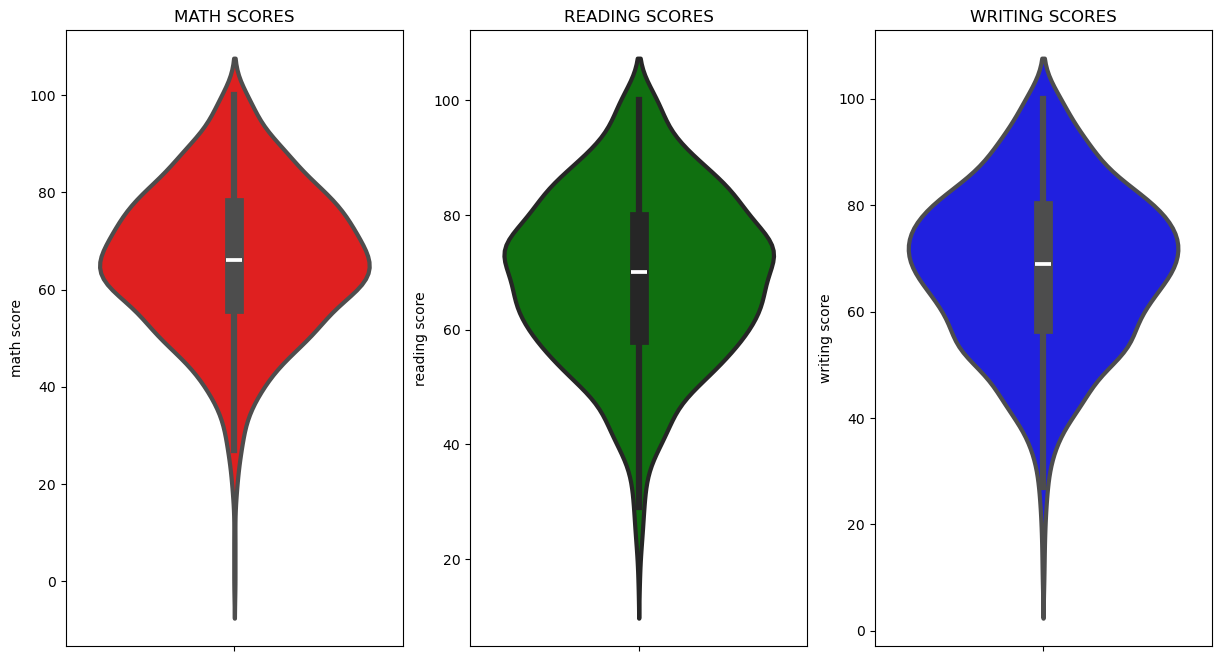

In [354]:
plt.figure(figsize=(20,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.6 Multivariate analysis

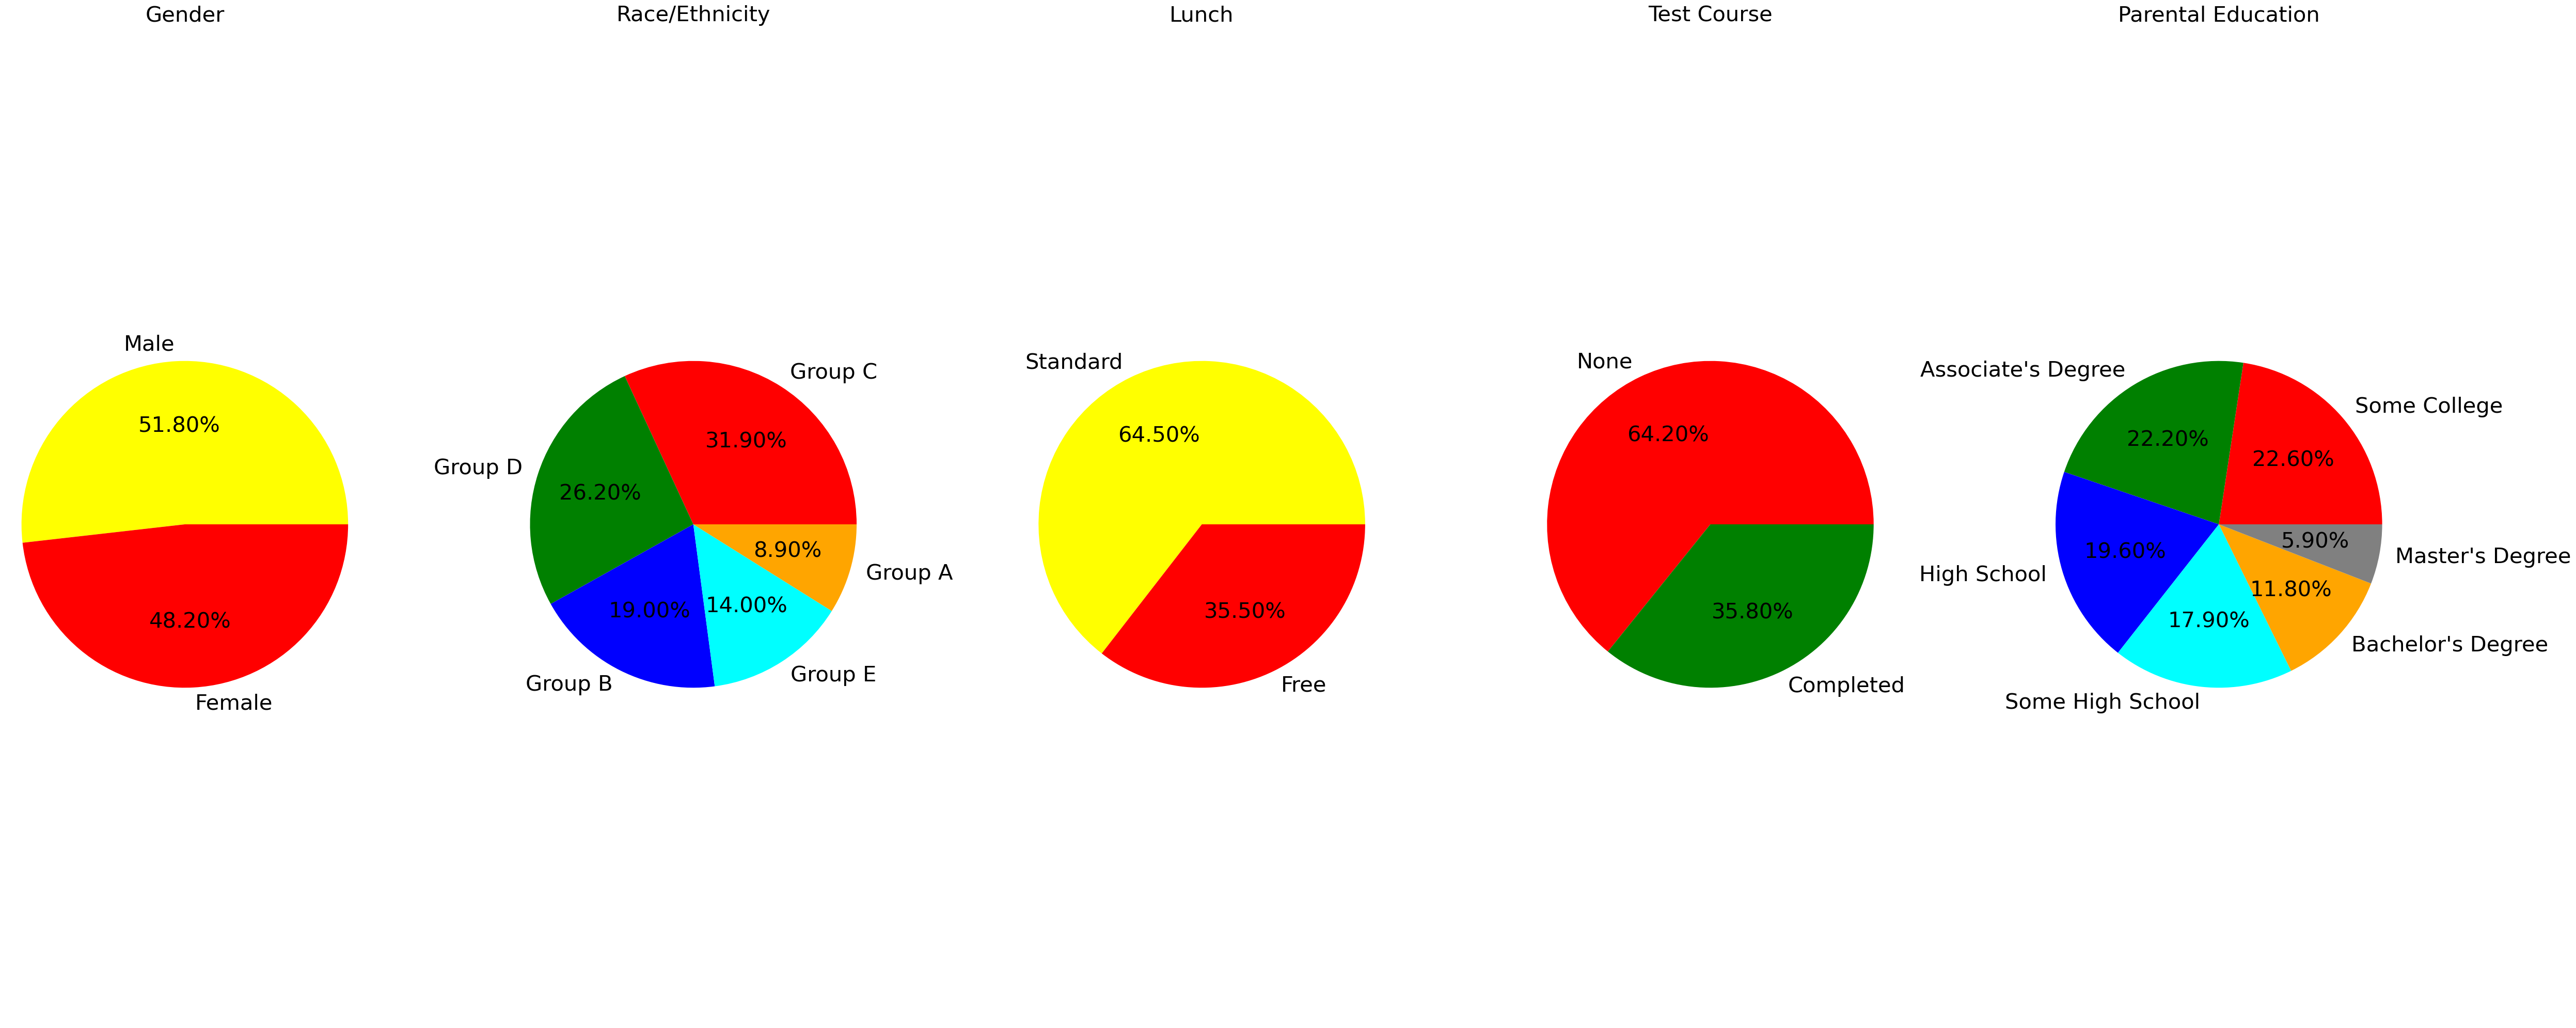

In [256]:
plt.figure(figsize=(50, 20))

# First Subplot - Gender Distribution
plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = ['Male', 'Female']
colors = ['yellow', 'red']
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%', textprops={'fontsize':30})
plt.title('Gender', fontsize=30)
plt.axis('equal')  # Ensures the pie chart is circular

# Second Subplot - Race/Ethnicity Distribution
plt.subplot(1, 5, 2)
size = data['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%', textprops={'fontsize':30})
plt.title('Race/Ethnicity', fontsize=30)
plt.axis('equal')

# Third Subplot - Lunch Type Distribution
plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = ['Standard', 'Free']
colors = ['yellow', 'red']
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%', textprops={'fontsize':30})
plt.title('Lunch', fontsize=30)
plt.axis('equal')

# Fourth Subplot - Test Preparation Course
plt.subplot(1, 5, 4)
size = data['test preparation course'].value_counts()
labels = ['None', 'Completed']
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops={'fontsize':30})
plt.title('Test Course', fontsize=30)
plt.axis('equal')

# Fifth Subplot - Parental Level of Education
plt.subplot(1, 5, 5)
size = data['parental level of education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops={'fontsize':30})
plt.title('Parental Education', fontsize=30)
plt.axis('equal')

plt.tight_layout()  
plt.show()


Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree

### Pairplot fot multivariate analysis

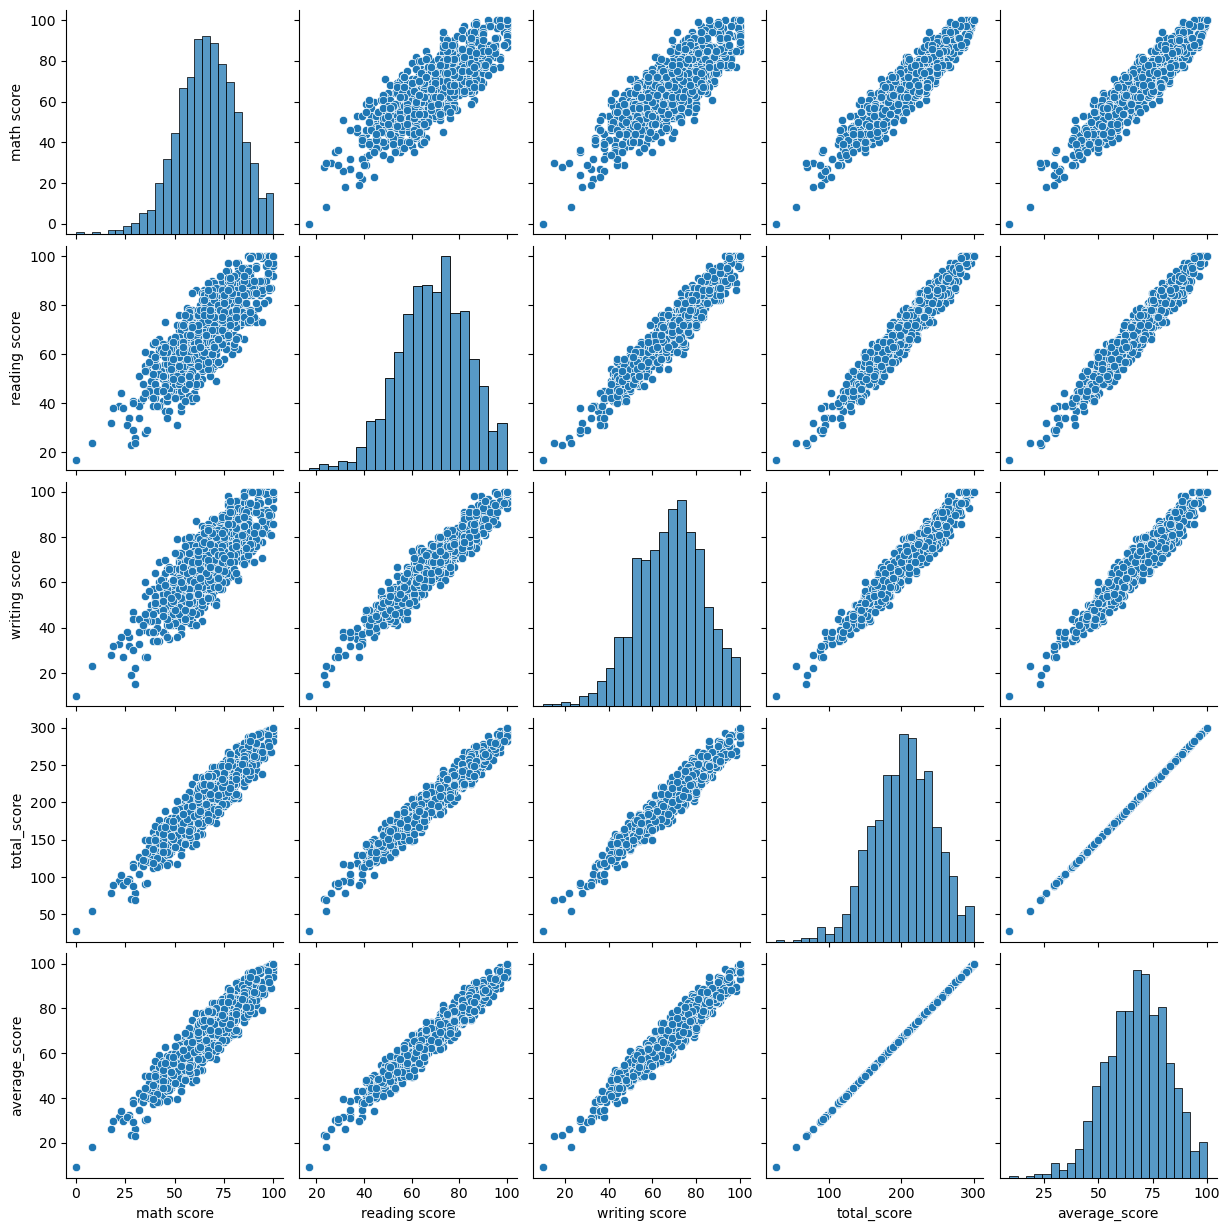

In [274]:
sns.pairplot(data)
plt.show()

### Bivariate Analysis

Cross-tabulation of Gender and Lunch Type:
 lunch   free/reduced  standard
gender                        
female           189       329
male             166       316


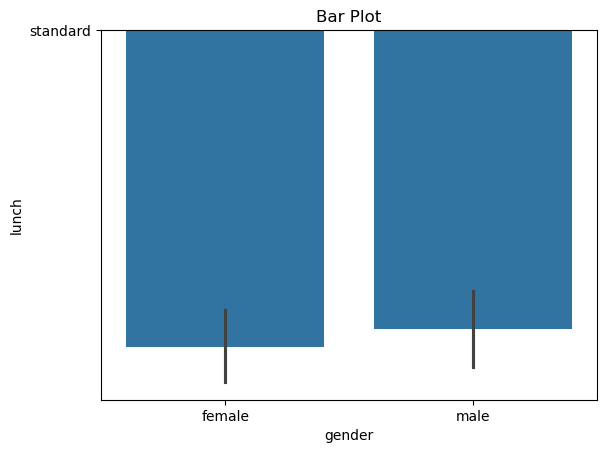

In [318]:
crosstab = pd.crosstab(data['gender'], data['lunch']) #contigency table
print("Cross-tabulation of Gender and Lunch Type:\n", crosstab)

sns.barplot(data=data, x='gender', y='lunch')
plt.title('Bar Plot')
plt.show()


Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='test preparation course', ylabel='writing score'>

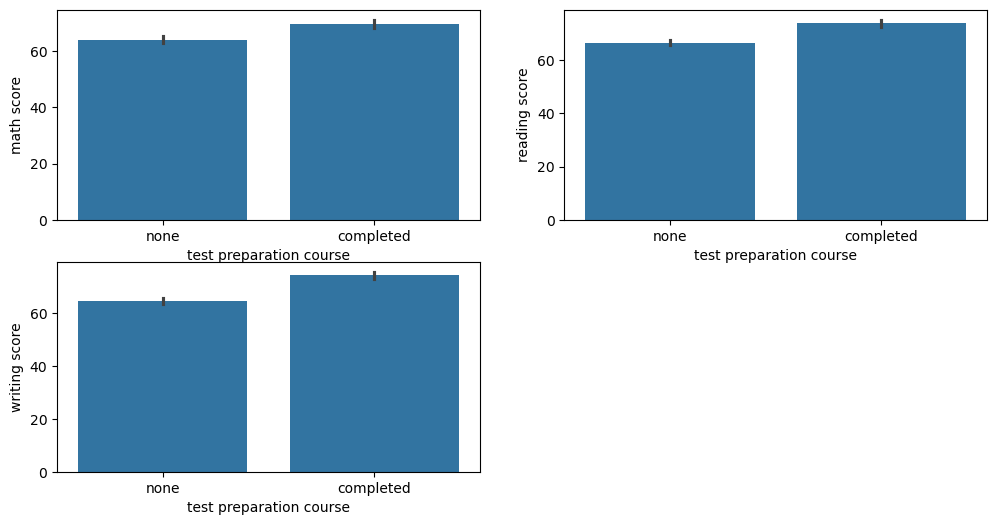

In [324]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['test preparation course'], y=data['math score'])
plt.subplot(2,2,2)
sns.barplot (x=data['test preparation course'], y=data['reading score'])
plt.subplot(2,2,3)
sns.barplot (x=data['test preparation course'], y=data['writing score'])

Is lunch type intake has any impact on student's performance ?

<Axes: xlabel='lunch', ylabel='writing score'>

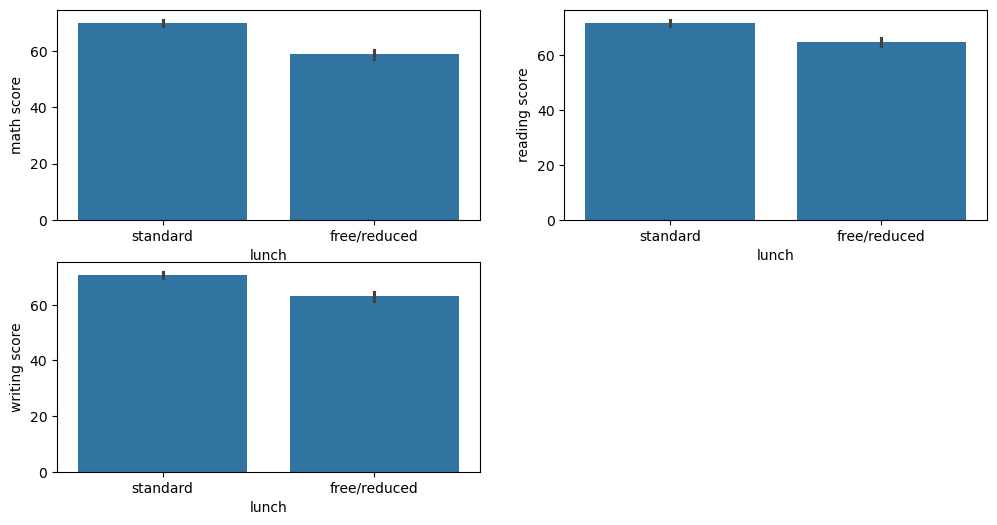

In [329]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['lunch'], y=data['math score'])
plt.subplot(2,2,2)
sns.barplot (x=data['lunch'], y=data['reading score'])
plt.subplot(2,2,3)
sns.barplot (x=data['lunch'], y=data['writing score'])

### Univariate Analysis

How is distribution of Gender ?

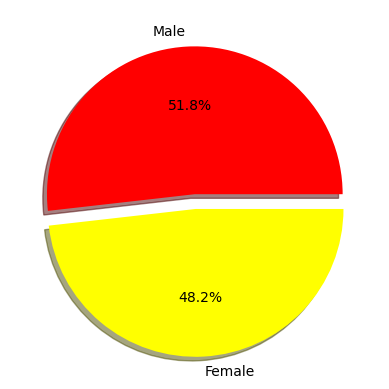

In [334]:
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['red','yellow'])
plt.show()

How is Group wise distribution ?

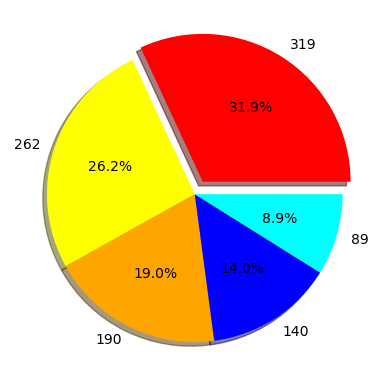

In [343]:
plt.pie(x=data['race/ethnicity'].value_counts(),labels=data['race/ethnicity'].value_counts(),explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=['red','yellow','orange','blue','cyan'])
plt.show()

### Checking Outliers

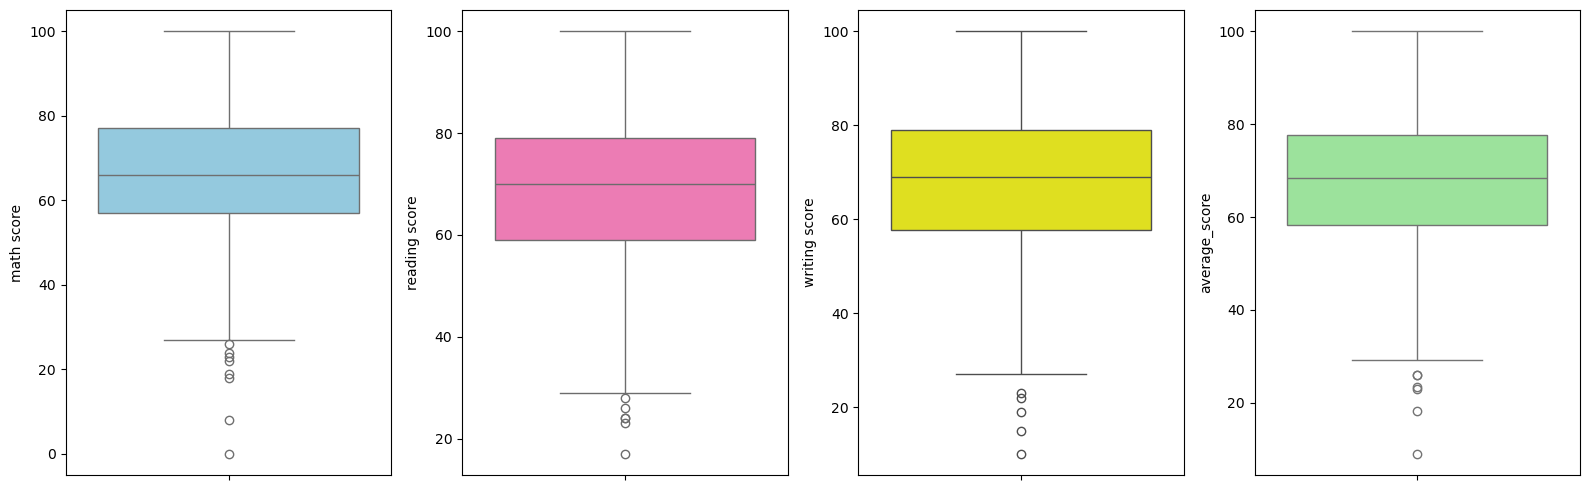

In [350]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average_score'],color='lightgreen')
plt.tight_layout()
plt.show()

### CONCLUSIONS

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.

In [364]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [366]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 5) Model Training

In [627]:
data = pd.DataFrame(data)
data


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [628]:
X = data.drop(columns='average_score', axis=1)

In [629]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [630]:
y = data['average_score']

In [631]:
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average_score, Length: 1000, dtype: float64

In [632]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler #helps us to create a pipeline first categorical col are converted to numerical use OHE and then on all these numerical col(inclding the converted one) we can apply standardization/normaliztion. 
from sklearn.compose import ColumnTransformer #helps to combine OneHotEncoder, StandardScaler first OHE should happen and then standardscaler

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, cat_col),
        ("StandardScaler", numeric_transformer, num_col)
    ]
)

In [633]:
X = preprocessor.fit_transform(X)

In [634]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.39002351,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.19207553,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.46775108,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.12609287,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  0.71993682,
         1.15336989,  1.18158627]])

In [635]:
X.shape

(1000, 20)

In [636]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape


((800, 20), (200, 20))

In [637]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    train_metrics = evaluate_model(y_train, y_train_pred)
    test_metrics = evaluate_model(y_test, y_test_pred)

    print(f"{name} Performance:")
    print("Training set - RMSE: {:.4f}, MAE: {:.4f}, R2: {:.4f}".format(*train_metrics))
    print("Test set - RMSE: {:.4f}, MAE: {:.4f}, R2: {:.4f}".format(*test_metrics))
    print("=" * 35, "\n")


Linear Regression Performance:
Training set - RMSE: 0.0000, MAE: 0.0000, R2: 1.0000
Test set - RMSE: 0.0000, MAE: 0.0000, R2: 1.0000

Lasso Performance:
Training set - RMSE: 0.8506, MAE: 1.0645, R2: 0.9943
Test set - RMSE: 0.8769, MAE: 1.1142, R2: 0.9942

Ridge Performance:
Training set - RMSE: 0.0065, MAE: 0.0080, R2: 1.0000
Test set - RMSE: 0.0067, MAE: 0.0088, R2: 1.0000

K-Neighbors Regressor Performance:
Training set - RMSE: 1.7680, MAE: 2.2573, R2: 0.9745
Test set - RMSE: 2.2833, MAE: 3.0706, R2: 0.9560

Decision Tree Performance:
Training set - RMSE: 0.0000, MAE: 0.0000, R2: 1.0000
Test set - RMSE: 1.0650, MAE: 1.5295, R2: 0.9891

Random Forest Performance:
Training set - RMSE: 0.1916, MAE: 0.2920, R2: 0.9996
Test set - RMSE: 0.5177, MAE: 1.1106, R2: 0.9942

XGBRegressor Performance:
Training set - RMSE: 0.0406, MAE: 0.0570, R2: 1.0000
Test set - RMSE: 0.5534, MAE: 1.0611, R2: 0.9947

AdaBoost Performance:
Training set - RMSE: 1.2497, MAE: 1.6258, R2: 0.9867
Test set - RMSE: 1.4